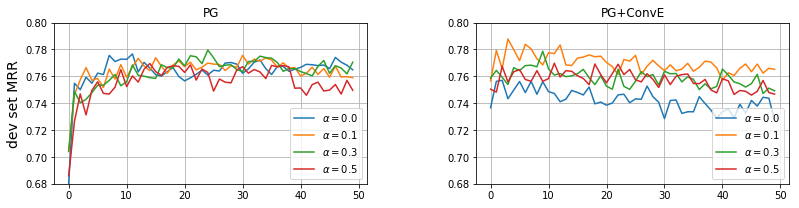

In [20]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

def read_data(method):
    num_iterations = 50
    model_dir = '/home/xilin/Projects/dtt/model'
    model_paths = {
        'point': (
            'NELL-995-point-xavier-n/a-200-200-3-0.001-0.3-0.1-0.0-0.95-20-400-0.05',
            'NELL-995-point-xavier-n/a-200-200-3-0.001-0.3-0.1-0.1-0.95-20-400-0.05',
            'NELL-995-point-xavier-n/a-200-200-3-0.001-0.3-0.1-0.3-0.95-20-400-0.05',
            'NELL-995-point-xavier-n/a-200-200-3-0.001-0.3-0.1-0.5-0.95-20-400-0.05'
        ),
        'point.rs.conve': (
            'NELL-995-point.rs.conve-xavier-n/a-200-200-3-0.003-0.3-0.1-0.0-256-0.05/',
            'NELL-995-point.rs.conve-xavier-n/a-200-200-3-0.003-0.3-0.1-0.1-256-0.05/',
            'NELL-995-point.rs.conve-xavier-n/a-200-200-3-0.003-0.3-0.1-0.3-256-0.05/',
            'NELL-995-point.rs.conve-xavier-n/a-200-200-3-0.003-0.3-0.1-0.5-256-0.05/'
        )
    }
    
    # y1
    with open(os.path.join(model_dir, model_paths[method][0], 'dev_metrics.dat')) as f:
        y1 = [float(l.strip()) for l in f]
        y1 = y1[:num_iterations]
    # y2
    with open(os.path.join(model_dir, model_paths[method][1], 'dev_metrics.dat')) as f:
        y2 = [float(l.strip()) for l in f]
        y2 = y2[:num_iterations]
    with open(os.path.join(model_dir, model_paths[method][2], 'dev_metrics.dat')) as f:
        y3 = [float(l.strip()) for l in f]
        y3 = y3[:num_iterations]
    with open(os.path.join(model_dir, model_paths[method][3], 'dev_metrics.dat')) as f:
        y4 = [float(l.strip()) for l in f]
        y4 = y4[:num_iterations]
        
    return y1, y2, y3, y4

# plot with various axes scales
plt.figure(figsize=(12, 6))

# dev set evaluation metrics
plt.subplot(221)
y1, y2, y3, y4 = read_data('point')
x = np.arange(len(y1))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.ylim((0.68, 0.8))
plt.yscale('linear')
plt.ylabel('dev set MRR', fontsize=14)
plt.legend((r'$\alpha=0.0$', r'$\alpha=0.1$', r'$\alpha=0.3$', r'$\alpha=0.5$'), loc='lower right')
plt.title('PG')
plt.grid(True)

plt.subplot(222)
y1, y2, y3, y4 = read_data('point.rs.conve')
x = np.arange(len(y1))
l1 = plt.plot(x, y1)
l2 = plt.plot(x, y2)
l3 = plt.plot(x, y3)
l4 = plt.plot(x, y4)
plt.ylim((0.68, 0.8))
plt.yscale('linear')
plt.title('PG+ConvE')
plt.legend((r'$\alpha=0.0$', r'$\alpha=0.1$', r'$\alpha=0.3$', r'$\alpha=0.5$'), loc='lower right')
plt.grid(True)

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()
